In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CL_megafon_Cup IT_2020_final_data.csv', sep=';')

In [3]:
df.head()

,time_start,time_end,place_latitude,place_longitude
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583


In [4]:
dates = pd.read_csv('Dates.csv', sep=';')

In [5]:
dates.head()

,Date,Weekday,half_holiday,Holiday,Holiday_weekends,Regular_weekends,All_weekends,Year,Month,number_in_Year,number_in_Month,Season
0,2018-01-01,Monday,0,1,1,0,1,2018,1,1,1,Winter
1,2018-01-02,Tuesday,0,0,1,0,1,2018,1,2,2,Winter
2,2018-01-03,Wednesday,0,0,1,0,1,2018,1,3,3,Winter
3,2018-01-04,Thursday,0,0,1,0,1,2018,1,4,4,Winter
4,2018-01-05,Friday,0,0,1,0,1,2018,1,5,5,Winter


In [6]:
df['time_start'] = pd.to_datetime(df['time_start'], yearfirst=True)
df['time_end'] = pd.to_datetime(df['time_end'], yearfirst=True)

In [7]:
df['delta'] = (df['time_end'] - df['time_start']).dt.seconds / 60

In [8]:
tt = df['delta'].iloc[0]

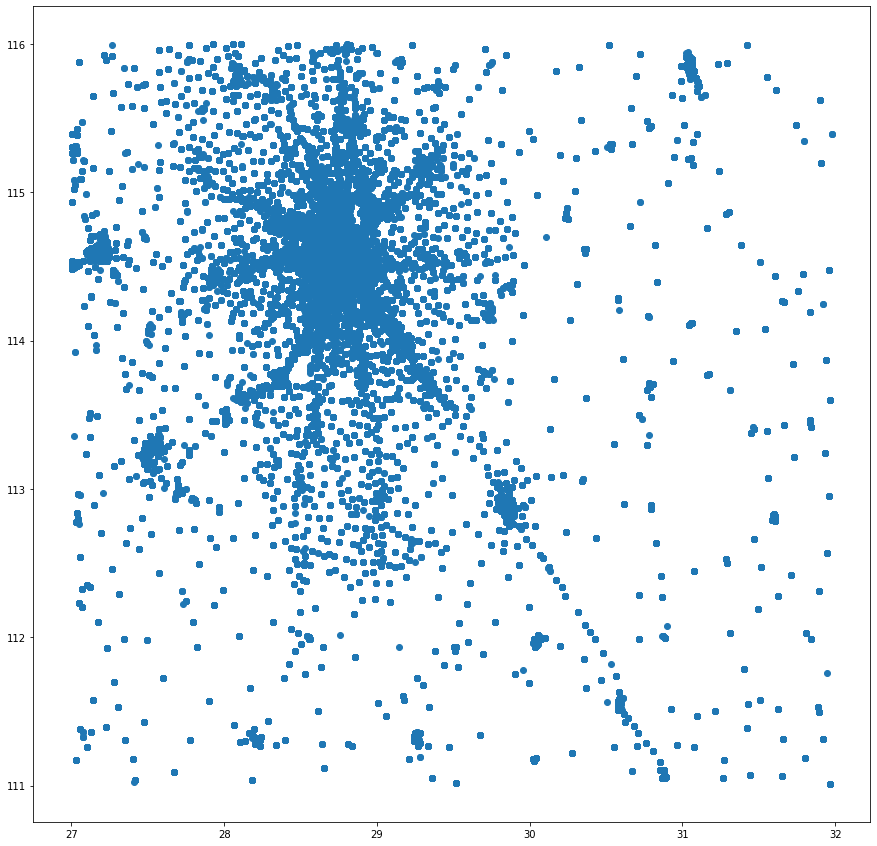

In [9]:
plt.figure(figsize=(15, 15))
plt.scatter(df['place_latitude'], df['place_longitude'])

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=10)

In [12]:
km.fit(df[['place_latitude', 'place_longitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
preds = km.predict(df[['place_latitude', 'place_longitude']])

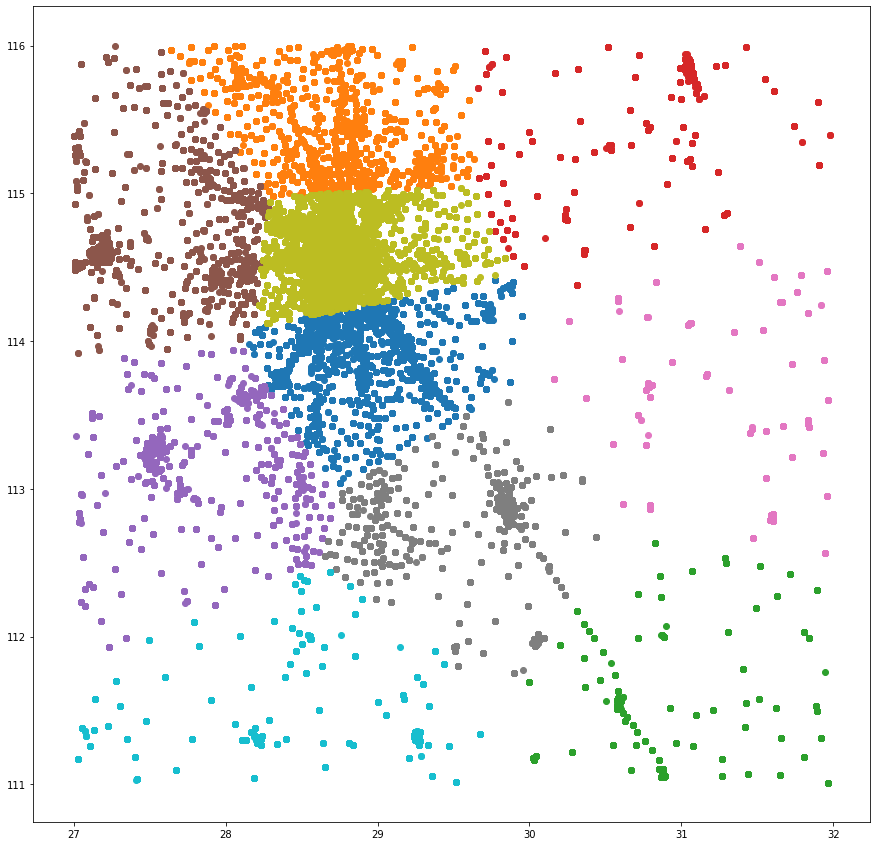

In [14]:
plt.figure(figsize=(15, 15))
for i in range(10):
    df_plot = df[preds == i]
    plt.scatter(df_plot['place_latitude'], df_plot['place_longitude'])

In [15]:
df['geo_cluster'] = preds

In [16]:
df.head()

,time_start,time_end,place_latitude,place_longitude,delta,geo_cluster
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,270.850000,4
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,199.066667,4
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,37.316667,4
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,33.933333,4
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,258.666667,1


In [17]:
st = df['time_start']

(array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 8.000e+00, 2.100e+01,
        1.400e+01, 1.500e+01, 1.800e+01, 2.000e+01, 1.400e+01, 1.600e+01,
        1.600e+01, 2.500e+01, 4.600e+01, 6.800e+01, 6.500e+01, 3.560e+02,
        7.520e+02, 3.950e+03, 6.502e+03, 6.603e+03, 7.523e+03, 7.676e+03,
        7.353e+03, 7.020e+03, 6.183e+03, 5.448e+03, 4.958e+03, 4.017e+03,
        2.840e+03, 2.251e+03, 2.161e+03, 2.267e+03]),
 array([-3.40119738, -3.13436038, -2.86752338, -2.60068638, -2.33384938,
        -2.06701238, -1.80017538, -1.53333838, -1.26650138, -0.99966438,
        -0.73282737, -0.46599037, -0.19915337,  0.06768363,  0.33452063,
         0.60135763,  0.86819463,  1.13503163,  1.40186863,  1.66870563,
         1.93554263,  2.20237963,  2.46921663,  2.73605363,  3.00289063,
         3.26972764,  3.53656464,  3.80340164,  4.07023864,  4.33707564,
         4.60391264,  4.87074964,  5.13758664,  5.40442364,  5.6

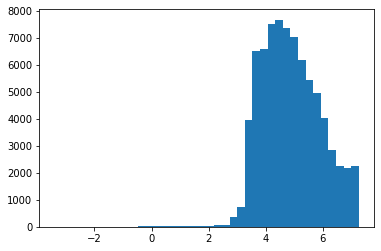

In [18]:
plt.hist(np.log(df['delta']), bins=40)

In [19]:
df['date_start'] = df['time_start'].dt.date

In [20]:
dates['Date'] = pd.to_datetime(dates['Date'])

In [21]:
df['date_start'] = pd.to_datetime(df['date_start'])

In [22]:
df_joined = pd.merge(df, dates, how='left', left_on='date_start', right_on='Date')

In [23]:
df_joined.head()

,time_start,time_end,place_latitude,place_longitude,delta,geo_cluster,date_start,Date,Weekday,half_holiday,Holiday,Holiday_weekends,Regular_weekends,All_weekends,Year,Month,number_in_Year,number_in_Month,Season
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,270.850000,4,2019-08-24,2019-08-24,Saturday,0,0,0,1,1,2019,8,236,24,Summer
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,199.066667,4,2018-06-19,2018-06-19,Tuesday,0,0,0,0,0,2018,6,170,19,Summer
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,37.316667,4,2018-08-29,2018-08-29,Wednesday,0,0,0,0,0,2018,8,241,29,Summer
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,33.933333,4,2019-12-10,2019-12-10,Tuesday,0,0,0,0,0,2019,12,344,10,Winter
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,258.666667,1,2019-12-10,2019-12-10,Tuesday,0,0,0,0,0,2019,12,344,10,Winter


In [24]:
df = df_joined.copy()

In [25]:
df.head()

,time_start,time_end,place_latitude,place_longitude,delta,geo_cluster,date_start,Date,Weekday,half_holiday,Holiday,Holiday_weekends,Regular_weekends,All_weekends,Year,Month,number_in_Year,number_in_Month,Season
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,270.850000,4,2019-08-24,2019-08-24,Saturday,0,0,0,1,1,2019,8,236,24,Summer
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,199.066667,4,2018-06-19,2018-06-19,Tuesday,0,0,0,0,0,2018,6,170,19,Summer
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,37.316667,4,2018-08-29,2018-08-29,Wednesday,0,0,0,0,0,2018,8,241,29,Summer
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,33.933333,4,2019-12-10,2019-12-10,Tuesday,0,0,0,0,0,2019,12,344,10,Winter
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,258.666667,1,2019-12-10,2019-12-10,Tuesday,0,0,0,0,0,2019,12,344,10,Winter


In [26]:
ts = df['time_start']

In [62]:
ts.dt.

0        14:23:56
1        08:56:22
2        14:00:32
3        16:01:26
4        13:39:42
           ...   
78218    11:25:04
78219    10:07:13
78220    22:59:34
78221    00:05:57
78222    02:24:15
Name: time_start, Length: 78223, dtype: object

In [27]:
df['hour'] = df['time_start'].dt.hour
#df['day'] = df['time_start'].dt.day
df['Weekday'] = df['time_start'].dt.dayofweek
#df['month'] = df['time_start'].dt.month
#df['year'] = df['time_start'].dt.year

In [28]:
df.head()

,time_start,time_end,place_latitude,place_longitude,delta,geo_cluster,date_start,Date,Weekday,half_holiday,Holiday,Holiday_weekends,Regular_weekends,All_weekends,Year,Month,number_in_Year,number_in_Month,Season,hour
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,270.850000,4,2019-08-24,2019-08-24,5,0,0,0,1,1,2019,8,236,24,Summer,14
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,199.066667,4,2018-06-19,2018-06-19,1,0,0,0,0,0,2018,6,170,19,Summer,8
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,37.316667,4,2018-08-29,2018-08-29,2,0,0,0,0,0,2018,8,241,29,Summer,14
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,33.933333,4,2019-12-10,2019-12-10,1,0,0,0,0,0,2019,12,344,10,Winter,16
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,258.666667,1,2019-12-10,2019-12-10,1,0,0,0,0,0,2019,12,344,10,Winter,13


In [36]:
df['log_target'] = np.log(df['delta'])
mask = trimboth(df['log_target'], 0.025).mask
df = df[mask == False]

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [57]:
oh_season = OneHotEncoder(sparse=False)

In [58]:
encoded_seasons = oh_season.fit_transform(df['Season'].values.reshape(-1, 1))

In [59]:
oh_weekday = OneHotEncoder(sparse=False)

In [60]:
encoded_weekdays = oh_weekday.fit_transform(df['Weekday'].values.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [61]:
from scipy.stats.mstats import trimboth

In [43]:
df.head()

,time_start,time_end,place_latitude,place_longitude,delta,geo_cluster,date_start,Date,Weekday,half_holiday,...,Holiday_weekends,Regular_weekends,All_weekends,Year,Month,number_in_Year,number_in_Month,Season,hour,log_target
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,270.850000,4,2019-08-24,2019-08-24,5,0,...,0,1,1,2019,8,236,24,Summer,14,5.601565
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,199.066667,4,2018-06-19,2018-06-19,1,0,...,0,0,0,2018,6,170,19,Summer,8,5.293640
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,37.316667,4,2018-08-29,2018-08-29,2,0,...,0,0,0,2018,8,241,29,Summer,14,3.619440
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,33.933333,4,2019-12-10,2019-12-10,1,0,...,0,0,0,2019,12,344,10,Winter,16,3.524398
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,258.666667,1,2019-12-10,2019-12-10,1,0,...,0,0,0,2019,12,344,10,Winter,13,5.555540


In [44]:
for i in df.columns:
    print(i)

time_start
time_end
place_latitude
place_longitude
delta
geo_cluster
date_start
Date
Weekday
half_holiday
Holiday
Holiday_weekends
Regular_weekends
All_weekends
Year
Month
number_in_Year
number_in_Month
Season
hour
log_target


In [49]:
oh_geo = OneHotEncoder(sparse=False)
encoded_geo = oh_geo.fit_transform(df['geo_cluster'].values.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [51]:
X = df[['place_latitude', 'place_longitude', 'Weekday', 'half_holiday', 'Holiday', 'Holiday_weekends',
       'Regular_weekends', 'All_weekends', 'Year', 'Month', 'number_in_Year', 'number_in_Month', 'hour']]
y = df['log_target']

In [50]:
X.head()

,place_latitude,place_longitude,Weekday,half_holiday,Holiday,Holiday_weekends,Regular_weekends,All_weekends,Year,Month,number_in_Year,number_in_Month,hour
0,28.102908,113.617867,5,0,0,0,1,1,2019,8,236,24,14
1,28.102908,113.617867,1,0,0,0,0,0,2018,6,170,19,8
2,28.102908,113.617867,2,0,0,0,0,0,2018,8,241,29,14
3,28.102908,113.617867,1,0,0,0,0,0,2019,12,344,10,16
4,28.999495,115.167583,1,0,0,0,0,0,2019,12,344,10,13


In [56]:
X.values

array([[ 28.10290833, 113.61786667,   5.        , ..., 236.        ,
         24.        ,  14.        ],
       [ 28.10290833, 113.61786667,   1.        , ..., 170.        ,
         19.        ,   8.        ],
       [ 28.10290833, 113.61786667,   2.        , ..., 241.        ,
         29.        ,  14.        ],
       ...,
       [ 28.619318  , 114.397573  ,   4.        , ..., 194.        ,
         13.        ,  22.        ],
       [ 28.619318  , 114.397573  ,   1.        , ..., 310.        ,
          6.        ,   0.        ],
       [ 28.619318  , 114.397573  ,   0.        , ..., 288.        ,
         15.        ,   2.        ]])

In [ ]:
sh = np.concatenate((X.values, encode))